<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_perfect_guide_07_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 07 군집화


### 01 K-평균 알고리즘 이해
K-평균 군집 중심점(Centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

![k-mean-clustering](https://user-images.githubusercontent.com/291782/142011995-c697fbde-af31-4f40-8c27-994fc3addb18.png)

K-평균의 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결  

&nbsp;  
K-평균의 단점
- 거리기반 알고리즘으로 속성의 개수가 매무 많을 경우 군집화 정확도가 떨어짐. (이를 위해 PCA로 차원감소 필요 할 수도 있음)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어려움

##### 사이킷런 Kmeans 클래스 소개

In [ ]:
class sklearn.cluster.KMeans(n_cluster=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                             precompute_distances='auto', verbose=0, random_state=None,
                             copy_x=True, n_jobs=1, algorithm='auto')

SyntaxError: ignored

이 중 중요한 파라미터는 아래와 같음.  
- KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미함.
- init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정함.
- max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료합니다.

&nbsp;  

KMeans 는 fit(데이터세트) 또는 fit_transform(데이터세트) 메서드를 이용해 수행하면 됨.  
다음은 주요 속성 정보
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표 (shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있음.


##### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
print(type(iris))
print(iris.data[:10])
# 더 편리한 데이터 핸들링을 위해 DF로 변환
irisdf = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisdf.head()

<class 'sklearn.utils.Bunch'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 붓꽃 데이터 세트를 3 그룹(n_cluster=3)으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisdf)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


labels_ 의 값이 0,1, 2로 되어 있으며 이는 각 레코드가 첫 번째 군집, 두번째 군집, 세번째 군집에 속함을 의미

In [ ]:
# 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인하겠음
irisdf['target'] = iris.target
irisdf['cluster'] = kmeans.labels_
iris_result = irisdf.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 분류 타겟 0 값인 데이터는 1번 군집으로 모두 잘 그룹핑 됨
- 분류 타겟 1 값인 데이터는 2개만 2번 군집, 나머지 48개는 모두 0번 군집으로 그룹핑 되었음.
- 하지만 분류 타겟이 2 값인 데이터는 0번 군집으로 14개, 2번 군집으로 36개가 분산되어 그룹핑 됨.

In [ ]:
# 군집화 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisdf['pca_x'] = pca_transformed[:, 0]
irisdf['pca_y'] = pca_transformed[:, 1]
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


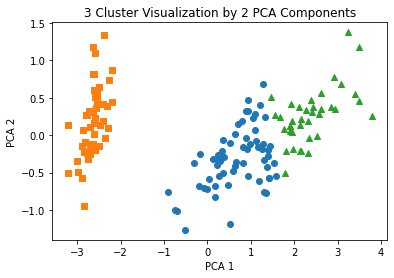

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisdf[irisdf['cluster'] == 0].index
marker1_ind = irisdf[irisdf['cluster'] == 1].index
marker2_ind = irisdf[irisdf['cluster'] == 2].index

# 군집 값이 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커표시
plt.scatter(x=irisdf.loc[marker0_ind, 'pca_x'], y=irisdf.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisdf.loc[marker1_ind, 'pca_x'], y=irisdf.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisdf.loc[marker2_ind, 'pca_x'], y=irisdf.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()

- Cluster 1을 나타내는 네모(square, s)는 명확히 다른 군집과 잘 분리돼 있음
- Cluster 0을 나타내는 동그라미('o')와 Cluster 2를 나타내는 세모('^')는 상당수준 분리되어 있지만, 네모만큼 명확하지는 않음.

##### 군집화 알고리즘 테스트를 위한 데이터 생성

make_blobs() 의 간략한 사용법을 알아보자.  
make_blobs()를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환 됨.  
make_blobs() 의 호출 파라미터는 다음과 같음  
- n_samples : 생성할 총 데이터 개수. 디폴트는 100개.
- n_features : 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정 해 보통 첫 번째는 X 좌표, 두 번째 피처는 Y 좌표상에 표현
- centers : int 값. 예를 들어 3으로 설정하면 군집의 개수를 나타냄. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미
- cluster_std : 생성될 군집 데이터의 표준 편차를 의미함. 만일 float 값 0.8로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐. [0.8, 1.2, 0.6] 과 같은 형태로 표현하면 첫번째 군집 내 데이터의 표준편차는 0.8, 두번째는 1.2 표준편차 데이터 형태로 만들어짐. 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용.

X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=0)을 호출하면 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와, 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환 됨.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


좀 더 데이터 가공을 편히라게 하기 위해 위 데이터 세트를 DF로 변경하겠음.  
피처 이름은 ftr1, ftr2

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


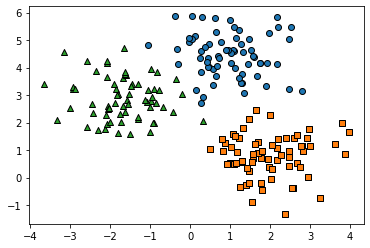

In [ ]:
target_list = np.unique(y)

# 각 타깃별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target=0, target=1, target=2 로 scatter plot을 marker 별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show()

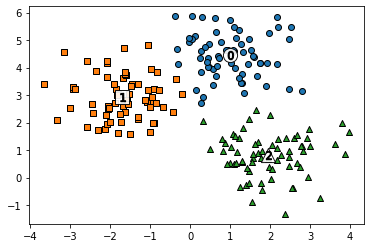

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


In [ ]:
# KMeans 객체를 이용해 X 데이터를 Kmeans 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels
# kmeans_label : 군집번호를 의미

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2']
                , edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolor='k', marker='$%d$' % label)
    
plt.show()

print(clusterDF.groupby('target')['kmeans_label'].value_counts())

### 02 군집평가 (Cluster Evaluation)



##### 실루엣분석의 개요 (silhouette analysis)

실루엣 분석은 실루엣 계수 (silhoutte coefficient)를 기반으로 함
실루엣 계수는 개별 데이터가 가지는 군집화 지표

실루엣 계수값 s(i) = $ \dfrac {(b(i) - a(i))} {max(a(i), b(i))} , \quad -1 \le s(i) \le 1$

실루엣 계수는 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, 0에 가까울수록 근처 군집과 가까워진다는 것임
마이너스(-) 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻함.